## 在Pandas中通过时间频率来汇总数据的三种常用方法
当我们的数据涉及日期和时间时，分析随时间变化变得非常重要。Pandas提供了一种方便的方法，可以按不同的基于时间的间隔(如分钟、小时、天、周、月、季度或年)对时间序列数据进行分组。

In [ ]:
!pip install seaborn

In [6]:
import pandas as pd  
import numpy as np 
# generating data consisting of weekly sales for the timeperiod Jan,2022 to Jan,2023 
dates =  pd.date_range('2022-01-01', '2023-06-30', freq = '1 W') 
sales_val = np.linspace(1000, 5000,len(dates) ) 
data = {'date':dates, 
        'sales': sales_val}  
# Load the data  
df = pd.DataFrame(data)  
# Convert the 'date' column to a datetime type  
df['date'] = pd.to_datetime(df['date'])  
df.sample(5)

,date,sales
54,2023-01-15,3805.194805
22,2022-06-05,2142.857143
56,2023-01-29,3909.090909
1,2022-01-09,1051.948052
8,2022-02-27,1415.584416


In [7]:
df.dtypes

date     datetime64[ns]
sales           float64
dtype: object

In [14]:
df

,date,sales
0,2022-01-02,1000.000000
1,2022-01-09,1051.948052
2,2022-01-16,1103.896104
3,2022-01-23,1155.844156
4,2022-01-30,1207.792208
...,...,...
73,2023-05-28,4792.207792
74,2023-06-04,4844.155844
75,2023-06-11,4896.103896
76,2023-06-18,4948.051948


## 1. pandas中的resample 方法
用于对时间序列数据进行重采样，可以将数据的频率更改为不同的间隔。例如将每日数据重新采样为每月数据。Pandas中的resample方法可用于基于时间间隔对数据进行分组。它接收frequency参数并返回一个Resampler对象，该对象可用于应用各种聚合函数，如mean、sum或count。resample()只在DataFrame的索引为日期或时间类型时才对数据进行重新采样。



Grouping is done on monthly basis using resample method:
                    sales
date                    
2022-01-31   5519.480519
2022-04-30  18545.454545
2022-07-31  31090.909091
2022-10-31  37987.012987
2023-01-31  46766.233766
2023-04-30  55545.454545
2023-07-31  38545.454545


Text(0.5, 1.0, 'Average Monthly sales with respect to  month')

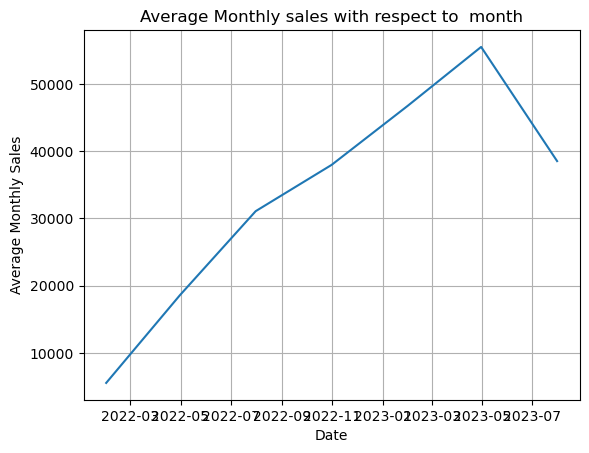

In [8]:
# resample
import matplotlib.pyplot as plt 
import seaborn as sns 
# Set the 'date' column as the index, 
# and Group the data by month using resample  
# grouped = df.set_index('date').resample('M').mean()  
grouped = df.set_index('date').resample('3M').sum()  
print("Grouping is done on monthly basis using resample method:\n", grouped) 
# plot the average of monthly sales 
sns.lineplot(grouped['sales']) 
plt.xlabel("Date") 
plt.ylabel("Average Monthly Sales") 
plt.grid(True) 
plt.title("Average Monthly sales with respect to  month")

In [9]:
grouped.dtypes

sales    float64
dtype: object

在本例中，我们首先将' date '列转换为日期类型，然后将其设置为DataFrame的索引。
然后使用重采样方法按月分组数据，并计算每个月的“sales”列的平均值。结果是一个新的DF，每个月有一行，还包含该月“sales”列的平均值。



## 2. pandas的Grouper 函数
可以与 groupby 方法一起使用，以根据不同的时间间隔（例如分钟、小时、天、周、月、季度或年）对数据进行分组。 Grouper 包含了key （包含日期的列）、frequency （分组依据的间隔）、closed （关闭间隔的一侧）和label （标记间隔）等参数。Pandas 中的 Grouper 函数提供了一种按不同时间间隔（例如分钟、小时、天、周、月、季度或年）对时间序列数据进行分组的便捷方法。 通过与Pandas 中的 groupby 方法 一起使用，可以根据不同的时间间隔对时间序列数据进行分组和汇总。

Grouper函数接受以下参数:

key:时间序列数据的列名。

freq:时间间隔的频率，如“D”表示日，“W”表示周，“M”表示月，等等。

closed:间隔是否应该在右侧(右)、左侧(左)或两侧(两个)闭合。

label :用它的结束(右)或开始(左)日期标记间隔。

Grouper函数和groupby一起按月间隔对数据进行分组:

In [10]:
df.dtypes

date     datetime64[ns]
sales           float64
dtype: object

In [11]:
df.head()

,date,sales
0,2022-01-02,1000.000000
1,2022-01-09,1051.948052
2,2022-01-16,1103.896104
3,2022-01-23,1155.844156
4,2022-01-30,1207.792208


Grouping is done on monthly basis using pandas.Grouper and groupby method:
                    sales
date                    
2022-01-31   5519.480519
2022-03-31  11532.467532
2022-05-31  16948.051948
2022-07-31  21155.844156
2022-09-30  22337.662338
2022-11-30  29103.896104
2023-01-31  33311.688312
2023-03-31  33142.857143
2023-05-31  41259.740260
2023-07-31  19688.311688


Text(0.5, 1.0, 'Average Monthly sales with respect to month using pd.Grouper and groupby ')

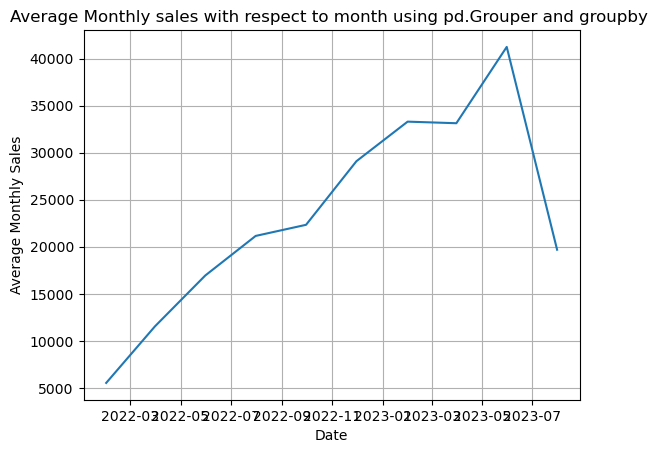

In [12]:
import matplotlib.pyplot as plt 
import seaborn as sns 
# Group the data by month using pd.Grouper and calculate monthly average 
# grouped = df.groupby(pd.Grouper(key='date', freq='M')).mean() 
# grouped = df.groupby(pd.Grouper(key='date', freq='M')).sum() 
grouped = df.groupby(pd.Grouper(key='date', freq='2M')).sum() 
print("Grouping is done on monthly basis using pandas.Grouper and groupby method:\n", grouped) 
# plot the average of monthly sales 
sns.lineplot(grouped['sales']) 
plt.xlabel("Date") 
plt.ylabel("Average Monthly Sales") 
plt.grid(True) 
plt.title("Average Monthly sales with respect to month using pd.Grouper and groupby ")


## 3、dt 访问器和 groupby
Pandas中的dt访问器可以从日期和时间类列中提取各种属性，例如年、月、日等。所以我们可以使用提取的属性根据与日期相关的信息对数据进行分组。

在Pandas中，使用dt访问器从DataFrame中的date和time对象中提取属性，然后使用groupby方法将数据分组为间隔。



In [13]:
import matplotlib.pyplot as plt 
import seaborn as sns 
# Group the data by month using dt and calculate monthly average 
grouped = df.groupby(df['date'].dt.to_period("M")).mean() 
print("Grouping is done on monthly basis using dt and groupby method:\n", grouped)

Grouping is done on monthly basis using dt and groupby method:
                        date        sales
date                                    
2022-01 2022-01-16 00:00:00  1103.896104
2022-02 2022-02-16 12:00:00  1337.662338
2022-03 2022-03-16 12:00:00  1545.454545
2022-04 2022-04-13 12:00:00  1753.246753
2022-05 2022-05-15 00:00:00  1987.012987
2022-06 2022-06-15 12:00:00  2220.779221
2022-07 2022-07-17 00:00:00  2454.545455
2022-08 2022-08-17 12:00:00  2688.311688
2022-09 2022-09-14 12:00:00  2896.103896
2022-10 2022-10-16 00:00:00  3129.870130
2022-11 2022-11-16 12:00:00  3363.636364
2022-12 2022-12-14 12:00:00  3571.428571
2023-01 2023-01-15 00:00:00  3805.194805
2023-02 2023-02-15 12:00:00  4038.961039
2023-03 2023-03-15 12:00:00  4246.753247
2023-04 2023-04-16 00:00:00  4480.519481
2023-05 2023-05-17 12:00:00  4714.285714
2023-06 2023-06-14 12:00:00  4922.077922


## 总结
这三种常用的方法可以汇总时间序列数据，所有方法都相对容易使用。在时间复杂度方面，所有方法对于中小型数据集都是有效的。

对于较大的数据集，resample的性能更好，因为它针对时间索引进行了优化。

而Grouper和dt提供了更大的灵活性，可以进行更复杂的分组操作。可以根据自己喜欢的语法或者特定的需求选择一种方法使用。